In [1]:
import os
import numpy as np
from nmf_methods.nmf_son.new import new as nmf_son_new
from nmf_methods.nmf_son.utils import save_results, load_results, plot_scores, plot_W_mats, plot_separate_H, plot_combined_H, merge_images, plot_and_merge
from sklearn.decomposition import NMF

np.random.seed(42)
np.set_printoptions(precision=3)

In [2]:
RUN = False

EARLY_STOP = True
VERBOSE = False
SCALE_REG = True

In [3]:
max_iters = 10000

In [4]:
M = np.load('../../experimental/datasets/jasper_small_2.npz')['X']
m, n = M.shape

In [5]:
r = n
# lambda_vals = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
# lambda_vals = [500, 750, 1500, 2000, 5000]
lambda_vals = [20000, 50000, 100000]
ini_filepath = f'../../experimental/saved_models/jasper_small_2/r{r}_ini.npz'
save_filepath = '../../experimental/saved_models/jasper_small_2/r{}_l{}_mit{}.npz'

In [6]:
if os.path.exists(ini_filepath):
    data = np.load(ini_filepath)
    ini_W = data['ini_W']
    ini_H = data['ini_H']
else:
    ini_W = np.random.rand(m, r)
    ini_H = np.random.rand(r, n)
    with open(ini_filepath, 'wb') as fout:
        np.savez_compressed(fout, ini_W=ini_W, ini_H=ini_H)

20000
50000
100000


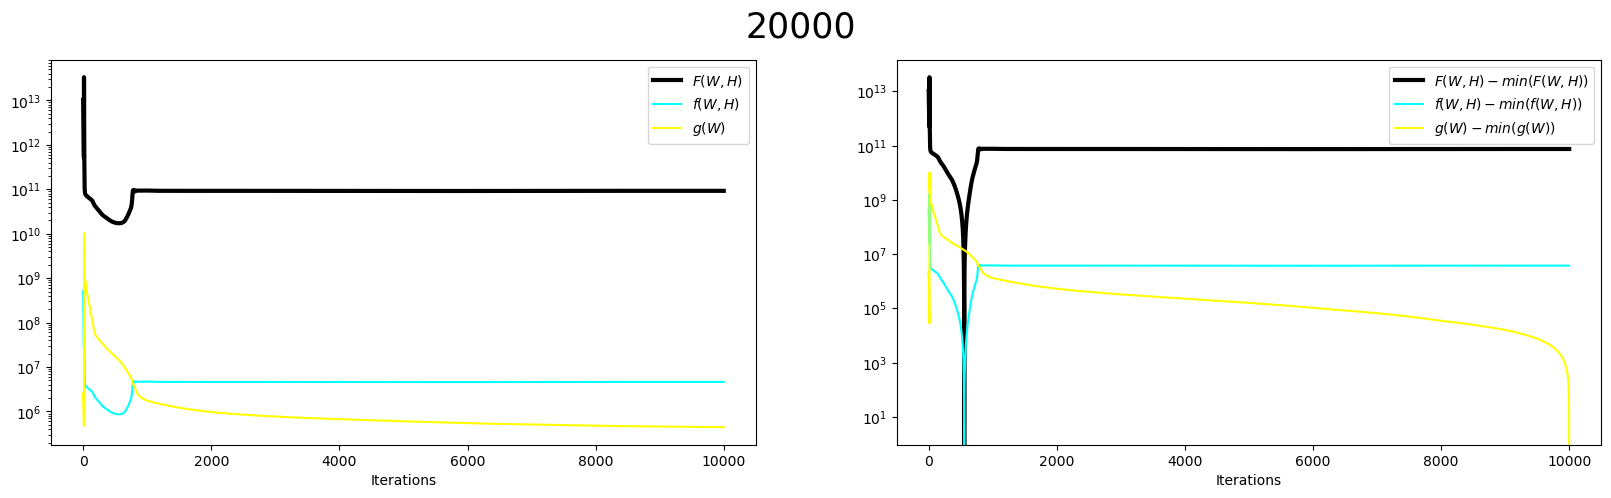

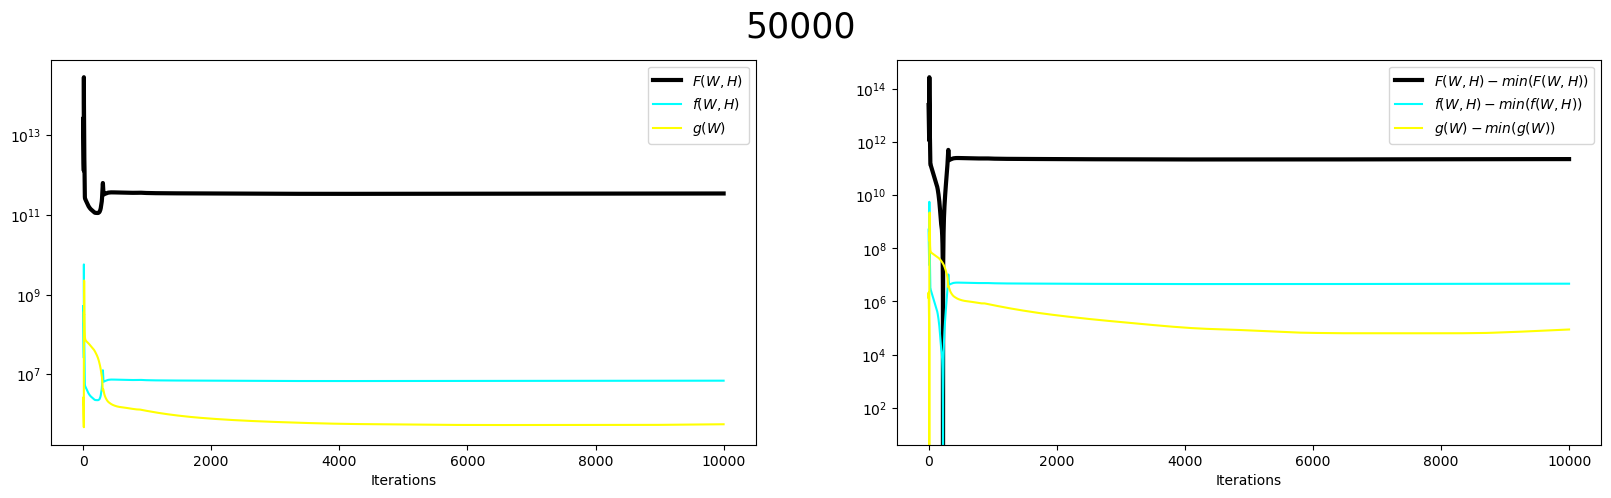

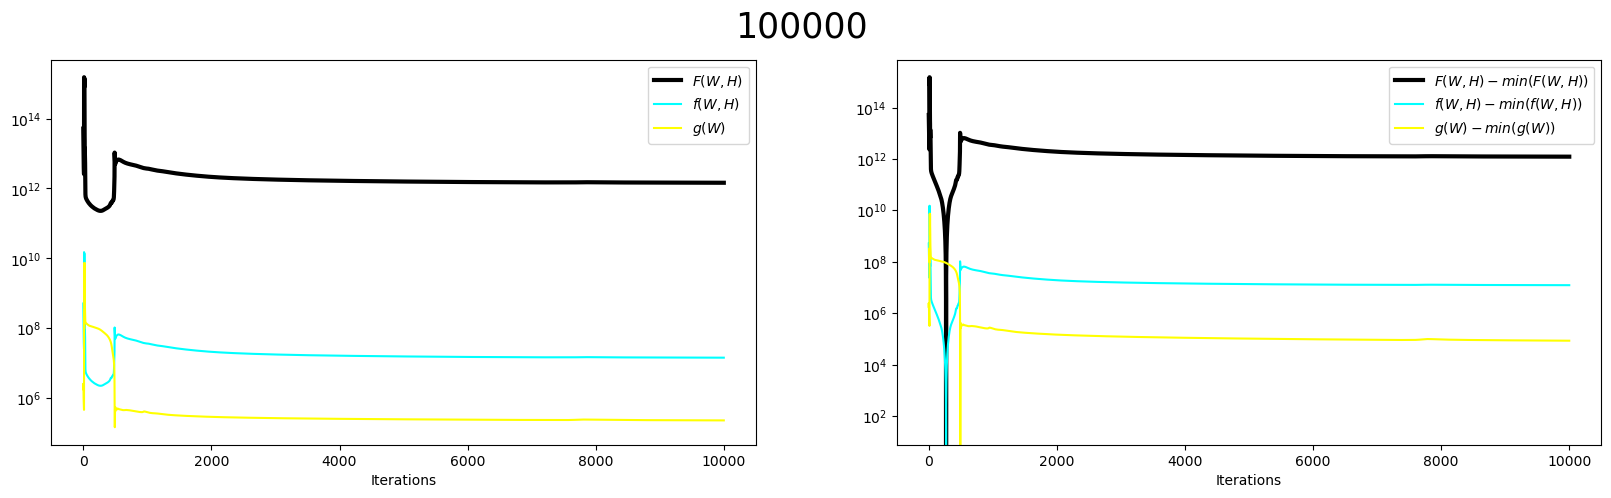

In [9]:
for _lam in lambda_vals:
    if RUN:
        W, H, fscores, gscores, lvals = nmf_son_new(M, ini_W.copy(), ini_H.copy(), lam=_lam, itermax=max_iters, early_stop=EARLY_STOP, verbose=VERBOSE, scale_reg=SCALE_REG)
        save_results(save_filepath.format(r, _lam, max_iters), W, H, fscores, gscores, lvals)
    else:
        W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters))
        plot_scores(fscores, gscores, lvals, plot_title=_lam)

        img_filenames = [f'../../experimental/images/jasper_small_2/w_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/jasper_small_2/seph_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/jasper_small_2/combh_r{r}_l{_lam}_mit{max_iters}.png', f'../../experimental/images/jasper_small_2/r{r}_l{_lam}_mit{max_iters}.png']
        plot_and_merge(W, H, imgsize=(10, 10), figsize=(32, 32), fontsize=10, filenames=img_filenames, num_rows=10)
    print(_lam)